In [36]:
from numpy import *
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat
    
dataMat = loadDataSet("testSet.txt")

print(dataMat)

[[1.658985, 4.285136], [-3.453687, 3.424321], [4.838138, -1.151539], [-5.379713, -3.362104], [0.972564, 2.924086], [-3.567919, 1.531611], [0.450614, -3.302219], [-3.487105, -1.724432], [2.668759, 1.594842], [-3.156485, 3.191137], [3.165506, -3.999838], [-2.786837, -3.099354], [4.208187, 2.984927], [-2.123337, 2.943366], [0.704199, -0.479481], [-0.39237, -3.963704], [2.831667, 1.574018], [-0.790153, 3.343144], [2.943496, -3.357075], [-3.195883, -2.283926], [2.336445, 2.875106], [-1.786345, 2.554248], [2.190101, -1.90602], [-3.403367, -2.778288], [1.778124, 3.880832], [-1.688346, 2.230267], [2.592976, -2.054368], [-4.007257, -3.207066], [2.257734, 3.387564], [-2.679011, 0.785119], [0.939512, -4.023563], [-3.674424, -2.261084], [2.046259, 2.735279], [-3.18947, 1.780269], [4.372646, -0.822248], [-2.579316, -3.497576], [1.889034, 5.1904], [-0.798747, 2.185588], [2.83652, -2.658556], [-3.837877, -3.253815], [2.096701, 3.886007], [-2.709034, 2.923887], [3.367037, -3.184789], [-2.121479, -4.23

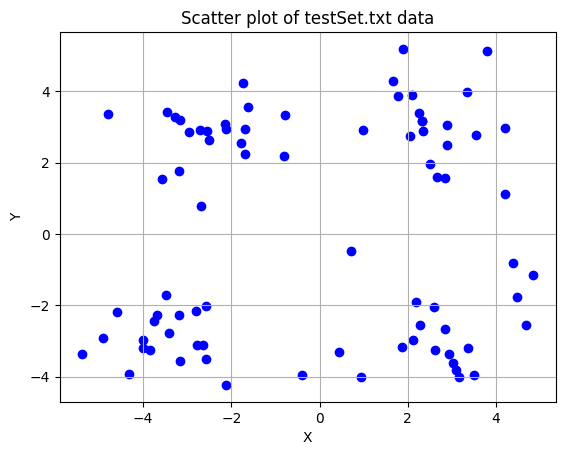

<module 'matplotlib.pyplot' from 'C:\\Users\\PaulE\\Documents\\MachineLearningCourse\\localenv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [61]:
import matplotlib.pyplot as plt
def plot(data):
    data = array(data)
    x = data[:, 0].flatten().tolist()
    y = data[:, 1].flatten().tolist()
    plt.scatter(x, y, c='blue', marker='o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot of testSet.txt data')
    plt.grid(True)
    plt.show()
plot(dataMat)

In [62]:
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))
print(dataMat[0], dataMat[1])
print(distEclud(array(dataMat[0]), array(dataMat[1])))

[1.658985, 4.285136] [-3.453687, 3.424321]
5.184632816681332


In [63]:
def randCent(dataSet, k):
    n = shape(dataSet)[1] #number columns
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids
centroids = randCent(array(dataMat), 4)
print(centroids)

[[ 0.71184111 -2.11587064]
 [-0.74702881 -2.46595913]
 [-1.37761995  4.6221808 ]
 [-3.06793772 -3.31664007]]


In [77]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        #print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment

centroids, clusterAssment = kMeans(array(dataMat), 4)
print(centroids)
print(clusterAssment)

[[ 2.6265299   3.10868015]
 [-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]
 [-2.46154315  2.78737555]]
[[ 0.          2.3201915 ]
 [ 3.          1.39004893]
 [ 2.          7.46974076]
 [ 1.          3.60477283]
 [ 0.          2.7696782 ]
 [ 3.          2.80101213]
 [ 2.          5.10287596]
 [ 1.          1.37029303]
 [ 0.          2.29348924]
 [ 3.          0.64596748]
 [ 2.          1.72819697]
 [ 1.          0.60909593]
 [ 0.          2.51695402]
 [ 3.          0.13871642]
 [ 2.          9.12853034]
 [ 2.         10.63785781]
 [ 0.          2.39726914]
 [ 3.          3.1024236 ]
 [ 2.          0.40704464]
 [ 1.          0.49023594]
 [ 0.          0.13870613]
 [ 3.          0.510241  ]
 [ 2.          0.9939764 ]
 [ 1.          0.03195031]
 [ 0.          1.31601105]
 [ 3.          0.90820377]
 [ 2.          0.54477501]
 [ 1.          0.31668166]
 [ 0.          0.21378662]
 [ 3.          4.05632356]
 [ 2.          4.44962474]
 [ 1.          0.41852436]
 [ 0.          0.47614274]


[0.0]
[[2.6265299  3.10868015]]
[[-3.53973889 -2.89384326]]
[[ 2.65077367 -2.79019029]]
[[-2.46154315  2.78737555]]


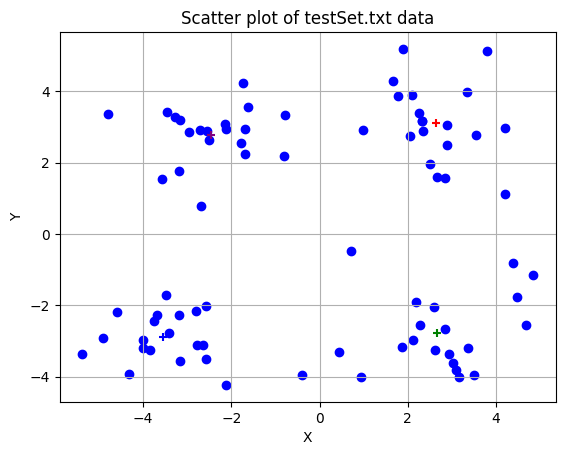

In [83]:
x = array(dataMat)[:, 0].flatten().tolist()
y = array(dataMat)[:, 1].flatten().tolist()
colors = {0 :"red", 1 : "blue", 2 : "green", 3 : "purple"}
#colors_points = list(map(lambda x : colors[int(x[0])], clusterAssment))
colors_points = list(map(lambda x : x[0], clusterAssment.flatten().tolist()))
print(colors_points)
plt.scatter(x, y, c='blue', marker='o')

for index, cen in enumerate(centroids):
    print(cen)
    plt.scatter(cen[0,0], cen[0, 1], c=colors[index], marker='+')
    
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of testSet.txt data')
plt.grid(True)
plt.show()
